# Logistic regression

## Context
The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, the attributes in this dataset is a subset of the original dataset. Several columns are simply ignored, and some of the important attritubes like age, account balance etc. are retained.

## Dataset: German Credit Risk

- Age (Numeric : Age in years)
- Sex (Categories : male, female)
- Job (Categories : 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing (Categories : own, rent, or free)
- Saving accounts (Categories : little, moderate, quite rich, rich)
- Checking account (Categories : little, moderate, rich)
- Credit amount (Numeric : Amount of credit in DM - Deutsche Mark)
- Duration (Numeric : Duration for which the credit is given in months)
- Purpose (Categories: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
- Risk (0 - Person is not at risk, 1 - Pesron is at risk(defaulter))

# Objective

The objective is to estimate probabilities whether a person would default or not using logistic regression. In this dataset, the target variable is 'Risk'.

# 1. Load Libraries and data

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve, precision_recall_curve, accuracy_score

# 2. Calculate the percentage of missing values for each column and fill those missing values.


In [3]:
credit_data = pd.read_csv('German_Credit.csv')
credit_data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [4]:
# Calculating the percentage of missing values for each column
((credit_data.isnull().sum())/(len(credit_data)))*100

Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64

In [5]:
# Filling missing values
credit_data['Saving accounts'].fillna(credit_data['Saving accounts'].mode()[0], inplace=True)
credit_data['Checking account'].fillna(credit_data['Checking account'].mode()[0], inplace=True)
credit_data.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [6]:
credit_data.describe()

,Age,Job,Credit amount,Duration,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,0.300000
std,11.375469,0.653614,2822.736876,12.058814,0.458487
min,19.000000,0.000000,250.000000,4.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,1.000000
max,75.000000,3.000000,18424.000000,72.000000,1.000000


# 3. Plot histogram for columns 'Credit amount' and 'Age'

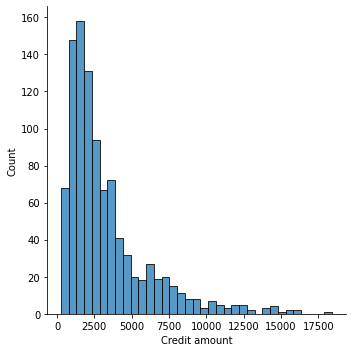

In [6]:
sns.displot(credit_data, x='Credit amount', kind='hist')

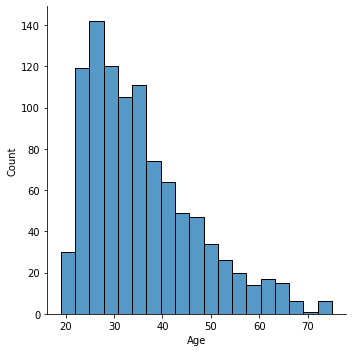

In [7]:
sns.displot(credit_data, x='Age', kind='hist')

# 4. Create counplots for columns 'Duration', 'Purpose'. What durations are most common and for what purposes most credits are taken?

<AxesSubplot:xlabel='Duration', ylabel='count'>

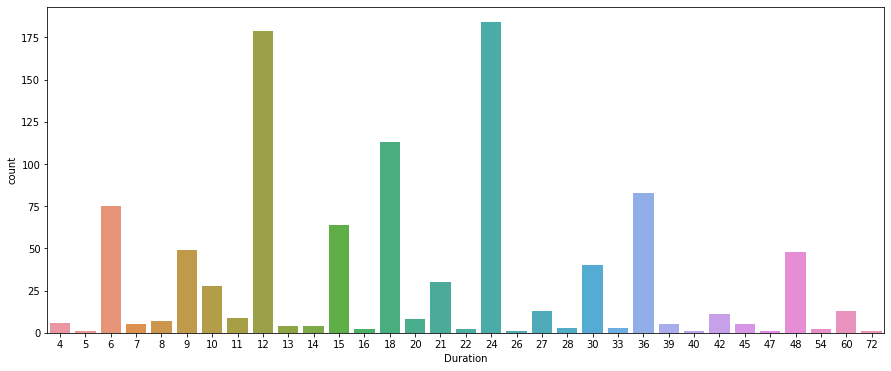

In [8]:
plt.figure(figsize=(15,6))
sns.countplot(credit_data['Duration'])

<AxesSubplot:xlabel='Purpose', ylabel='count'>

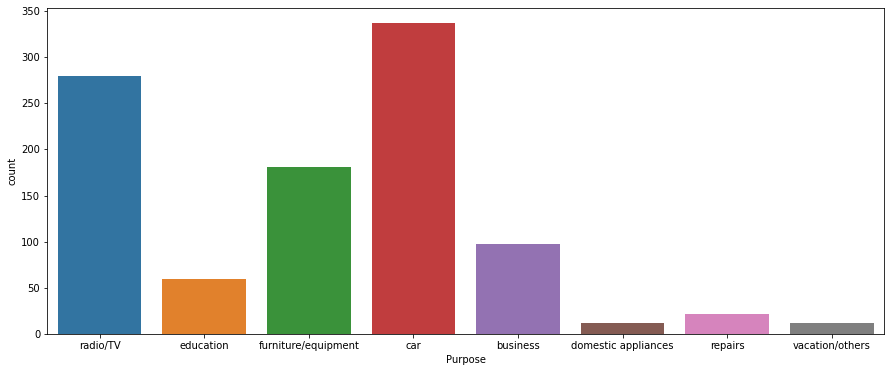

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(credit_data['Purpose'])

# 5. Which 'Job', 'Savings account', 'Checking account' has highest number of defaulters?

<AxesSubplot:xlabel='Job', ylabel='count'>

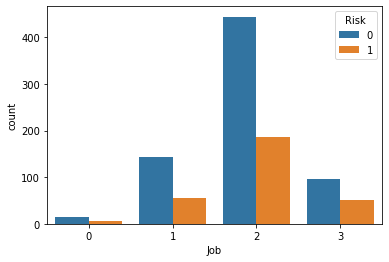

In [10]:
sns.countplot(credit_data['Job'], hue=credit_data['Risk'])

<AxesSubplot:xlabel='Saving accounts', ylabel='count'>

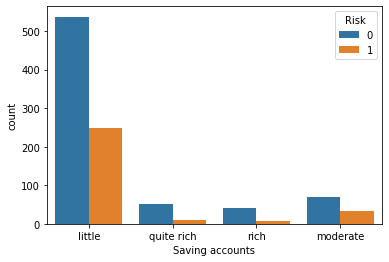

In [11]:
sns.countplot(credit_data['Saving accounts'], hue=credit_data['Risk'])

<AxesSubplot:xlabel='Checking account', ylabel='count'>

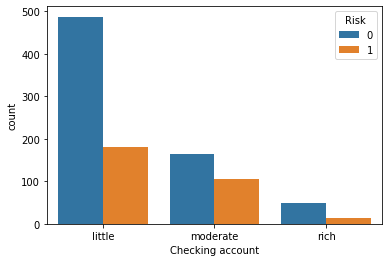

In [12]:
sns.countplot(credit_data['Checking account'], hue=credit_data['Risk'])

# 6. Convert 'Credit amount' and 'Age' into categorical features by grouping them into different intervals and drop the original columns.
You can decide the intervals using df.describe() method.

In [13]:
bins = [18, 27, 33, 43, 76]

cats = ['18-26', '27-32', '33-42', '43-76']
credit_data["Age_cat"] = pd.cut(credit_data.Age, bins, labels=cats)
credit_data['Age_cat']

0      43-76
1      18-26
2      43-76
3      43-76
4      43-76
       ...  
995    27-32
996    33-42
997    33-42
998    18-26
999    18-26
Name: Age_cat, Length: 1000, dtype: category
Categories (4, object): ['18-26' < '27-32' < '33-42' < '43-76']

In [14]:
bins = [249, 1365, 2319, 3972, 18425]

cats = ['low', 'moderate', 'high', 'very high']
credit_data['Credit_amount_cat'] = pd.cut(credit_data['Credit amount'], bins, labels=cats)
credit_data['Credit_amount_cat']

0            low
1      very high
2       moderate
3      very high
4      very high
         ...    
995     moderate
996         high
997          low
998     moderate
999    very high
Name: Credit_amount_cat, Length: 1000, dtype: category
Categories (4, object): ['low' < 'moderate' < 'high' < 'very high']

# 7. Find out total number of defaulters where for each category of 'Age' and  'Credit amount'.

In [15]:
credit_data.groupby(['Risk','Age_cat']).count()

Age  Sex  Job  Housing  Saving accounts  Checking account  \
Risk Age_cat                                                              
0    18-26    184  184  184      184              184               184   
     27-32    151  151  151      151              151               151   
     33-42    202  202  202      202              202               202   
     43-76    163  163  163      163              163               163   
1    18-26    107  107  107      107              107               107   
     27-32     74   74   74       74               74                74   
     33-42     64   64   64       64               64                64   
     43-76     55   55   55       55               55                55   

              Credit amount  Duration  Purpose  Credit_amount_cat  
Risk Age_cat                                                       
0    18-26              184       184      184                184  
     27-32              151       151      151                151  
     33-42              202       202      202                202  
     43-76              163       163      163                163  
1    18-26              107       107      107                107  
     27-32               74        74       74                 74  
     33-42               64        64       64                 64  
     43-76               55        55       55                 55

In [16]:
#Another way to use cross tab
pd.crosstab(credit_data['Age_cat'], credit_data['Risk'], margins=True)

Risk,0,1,All
Age_cat,,,
18-26,184,107,291
27-32,151,74,225
33-42,202,64,266
43-76,163,55,218
All,700,300,1000


In [17]:
pd.crosstab(credit_data['Credit_amount_cat'], credit_data['Risk'], margins=True)

Risk,0,1,All
Credit_amount_cat,,,
low,173,77,250
moderate,188,62,250
high,194,56,250
very high,145,105,250
All,700,300,1000


# 8. Prepare input data for the model

### Separate dependent and independent variables

In [18]:
credit_data.drop(['Credit amount', 'Age'], axis=1, inplace=True)

In [19]:
X = credit_data.drop('Risk', axis=1)
y = credit_data['Risk']
X.Duration=X.Duration/12

### One hot enocding for all the categorical variables

In [20]:
X = pd.get_dummies(data=X, drop_first=True)
X

,Job,Duration,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_moderate,Checking account_rich,...,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Age_cat_27-32,Age_cat_33-42,Age_cat_43-76,Credit_amount_cat_moderate,Credit_amount_cat_high,Credit_amount_cat_very high
0,2,0.50,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,4.00,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1.00,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,2,3.50,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,2,2.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1.00,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
996,3,2.50,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
997,2,1.00,1,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
998,2,3.75,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Split data into train and test (maintain the ratio of both classes in train and test set same as the original dataset)

In [25]:
print(len(y[y==1])/len(y))
print(len(y[y==0])/len(y))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print(len(y_train[y_train==1])/len(y_train))
print(len(y_train[y_train==0])/len(y_train))

0.3
0.7
0.3057142857142857
0.6942857142857143


# 9. Predict Target Variable for Test Data using Sklearn

In [29]:
logit_reg = LogisticRegression(solver='liblinear')
logit_reg.fit(X_train, y_train)
y_predict = logit_reg.predict(X_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

# 10. Try calculating Probabilities of Target using Sklearn

In [31]:
y_predict_probabilities = logit_reg.predict_proba(X_test)
y_predict_probabilities[:,1]

array([0.16385777, 0.23857302, 0.11528426, 0.26654882, 0.68211588,
       0.18929522, 0.23566625, 0.37867463, 0.31847315, 0.19253397,
       0.34542072, 0.19458254, 0.57674932, 0.13077218, 0.20417126,
       0.29940523, 0.25887934, 0.14561889, 0.10413484, 0.69237284,
       0.25945483, 0.3053324 , 0.22641023, 0.11547252, 0.46653022,
       0.09045833, 0.46061611, 0.19859934, 0.1646154 , 0.72176525,
       0.26697535, 0.20447372, 0.54287421, 0.21017485, 0.15930174,
       0.36024907, 0.48042313, 0.21447032, 0.20502693, 0.35866147,
       0.32853698, 0.38587678, 0.14375713, 0.47594038, 0.08509738,
       0.39663127, 0.23453092, 0.21522889, 0.14531992, 0.34133178,
       0.20428479, 0.32630891, 0.39966975, 0.52152139, 0.52060126,
       0.32333191, 0.24159784, 0.7442097 , 0.07330658, 0.65859981,
       0.22735042, 0.16561554, 0.67741932, 0.08986775, 0.26654882,
       0.43363109, 0.18889522, 0.1633535 , 0.50690351, 0.42563592,
       0.109384  , 0.22789805, 0.07692243, 0.44127955, 0.15082

# 11. Build a confusion matrix and display the same using heatmap plot

In [33]:
conf_matrix = confusion_matrix(y_test, y_predict)
conf_matrix

array([[197,  17],
       [ 64,  22]])

<AxesSubplot:>

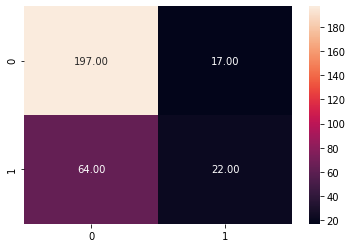

In [35]:
sns.heatmap(conf_matrix, fmt='.2f', annot=True)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83       214
           1       0.56      0.26      0.35        86

    accuracy                           0.73       300
   macro avg       0.66      0.59      0.59       300
weighted avg       0.70      0.73      0.69       300



# 12.  Make a predicted probability distribution plot for defaulters and non defaulters

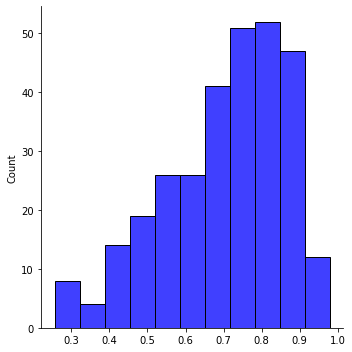

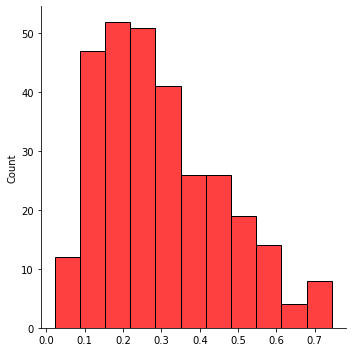

In [39]:
sns.displot(y_predict_probabilities[:,0], kde=False, color='b')
sns.displot(y_predict_probabilities[:,1], kde=False, color='r')
plt.show()

# 13. Give your conclusion for the problem. Which evaluation metric would you choose? 